## TAREA 6
## Moreno Puente Emilia Cristina
----------------------------------------------------------------------------

1) Aproximación de la función mediante Serie de Taylor y Polinomio de Lagrange

Determinar el orden de la mejor aproximación para la función:

$
f(x) = \frac{1}{25x^2 + 1}, \quad x_0 = 0
$

Además:
1. Escribir las fórmulas de los diferentes polinomios.  
2. Graficar las diferentes aproximaciones.


Orden 6 Taylor

In [ ]:
import sympy as sp

x = sp.symbols('x')
f = 1 / (25*x**2 + 1)


derivadas = [sp.diff(f, x, i) for i in range(7)]
derivadasEvaluadas = [d.subs(x, 0) for d in derivadas]

def taylor(x0, orden):
    p = 0
    for i in range(orden + 1):
        p += derivadasEvaluadas[i] * (x - x0)**i / sp.factorial(i)
    return p

x0 = 0
orden = 6

for i in range(orden + 1):
    p = taylor(x0, i)
    print(f"Polinomio de Taylor de orden {i}: {sp.simplify(p)}")


Polinomio de Taylor de orden 0: 1
Polinomio de Taylor de orden 1: 1
Polinomio de Taylor de orden 2: 1 - 25*x**2
Polinomio de Taylor de orden 3: 1 - 25*x**2
Polinomio de Taylor de orden 4: 625*x**4 - 25*x**2 + 1
Polinomio de Taylor de orden 5: 625*x**4 - 25*x**2 + 1
Polinomio de Taylor de orden 6: -15625*x**6 + 625*x**4 - 25*x**2 + 1


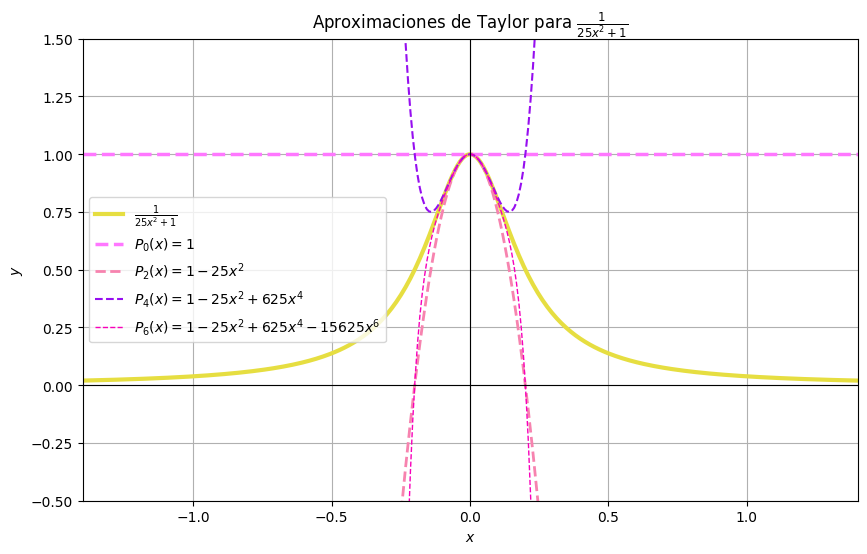

In [12]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1.4, 2, 400)

fOriginal = 1 / (25 * (x**2) + 1)

P0 = np.ones_like(x)
P2 = 1 - 25 * (x**2)  
P4 = 1 - 25 * (x**2) + 625 * (x**4)
P6=-15625 * (x**6) + 625 * (x**4) - 25 * (x**2) + 1

plt.figure(figsize=(10, 6))

plt.plot(x, fOriginal, label=r'$\frac{1}{25x^2 + 1}$', color="#E6DE41",linewidth=3)
plt.plot(x, P0, '--', label=r'$P_0(x) = 1$', color='#FF77FF',linewidth=2.5)
plt.plot(x, P2, '--', label=r'$P_2(x) = 1 - 25x^2$', color="#F783AF", linewidth=2)
plt.plot(x, P4, '--', label=r'$P_4(x) = 1 - 25x^2 + 625x^4$', color="#960EF0", linewidth=1.5)
plt.plot(x, P6, '--', label=r'$P_6(x) = 1 - 25x^2 + 625x^4 - 15625x^6$', color="#F800BA", linewidth=1)

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Aproximaciones de Taylor para $\frac{1}{25x^2 + 1}$')
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.grid(True)
plt.legend()
plt.ylim(-0.5, 1.5)
plt.xlim(-1.4, 1.4)
plt.show()

Orden 6 Lagrange

In [32]:

def f(x):
    return 1 / (25*x**2 + 1)

n = 7
xi = -0.25

xf = 0.25

xs = [-0.2, -0.1, -0.07, 0, 0.07, 0.1, 0.2]
ys = [f(x) for x in xs]


def mult_poly(p, q):
    res = [0]*(len(p)+len(q)-1)
    for i in range(len(p)):
        for j in range(len(q)):
            res[i+j] += p[i]*q[j]
    return res


def sum_poly(p, q):
    if len(p) < len(q):
        p += [0]*(len(q)-len(p))
    if len(q) < len(p):
        q += [0]*(len(p)-len(q))
    return [p[i] + q[i] for i in range(len(p))]


def lagrange_manual(xs, ys):
    n = len(xs)
    P = [0]

    for i in range(n):
        Li = [1]
        denom = 1

        for j in range(n):
            if j != i:
                Li = mult_poly(Li, [-xs[j], 1])
                denom *= (xs[i] - xs[j])

        Li = [coef * ys[i] / denom for coef in Li]
        P = sum_poly(P, Li)
    return P

P = lagrange_manual(xs, ys)


print("Polinomio:")

degree = len(P)-1

s = "       "
for i, coef in enumerate(P[::-1]):
    power = degree - i
    if abs(coef) < 1e-12:
        coef = 0
    if power == 0:
        s += f"{coef:+.15f}"
    elif power == 1:
        s += f"{coef:+.15f} x + "
    else:
        s += f"{coef:+.15f} x^{power} + "

print(s)



Polinomio:
       -5567.928730512125185 x^6 + -0.000000000015689 x^5 + +528.396436525597551 x^4 + +0.000000000000000 x^3 + -24.727171492204768 x^2 + +0.000000000000000 x + +1.000000000000000


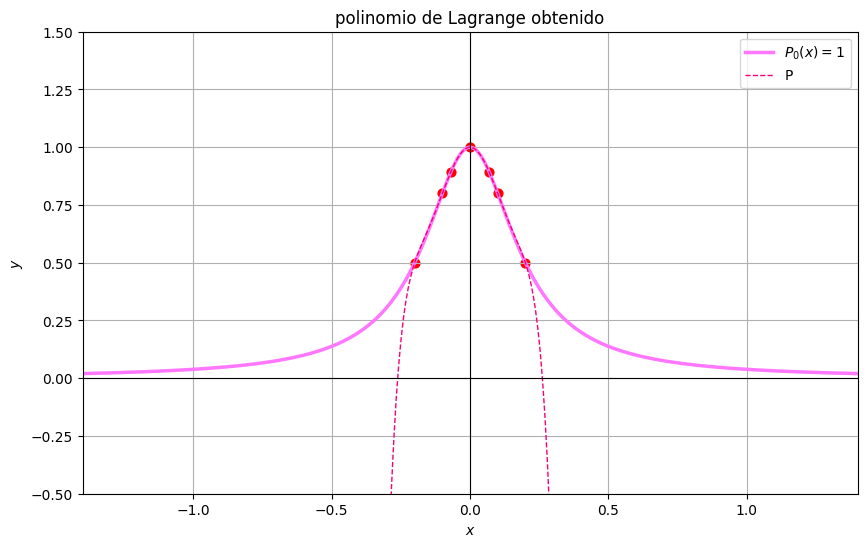

In [33]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1.4, 2, 400)

fO= 1 / (25 * (x**2) + 1)

P=-5567.9287 * x**6 + -0.000000000015689 * x**5 + +528.396436 * x**4 + -24.727 * x**2 +1

plt.figure(figsize=(10, 6))

plt.plot(x, fO, label=r'$P_0(x) = 1$', color='#FF77FF',linewidth=2.5)
plt.plot(x, P, '--', label=r'P', color="#F80078", linewidth=1)
xs = [-0.2, -0.1, -0.07,0, 0.07, 0.1, 0.2]
ys = [f(x) for x in xs]
for i in xs:
    plt.scatter(i, f(i), color='red', s=40)

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'polinomio de Lagrange obtenido')
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.grid(True)
plt.legend()
plt.ylim(-0.5, 1.5)
plt.xlim(-1.4, 1.4)
plt.show()

## Ejercicio2 

$$f(x)=arctan(x), x0=1$$

Taylor


In [48]:
import sympy as sp

x = sp.symbols('x')
f = sp.atan(x)

x0 = 1
orden = 6


derivadas = [sp.diff(f, x, i) for i in range(7)]
derivadasEvaluadas = [d.subs(x, x0) for d in derivadas]

def taylor(x0, orden):
    p = 0
    for i in range(orden + 1):
        p += derivadasEvaluadas[i] * (x - x0)**i / sp.factorial(i)
    return p

for i in range(orden + 1):
    p = taylor(x0, i)
    print(f"Polinomio de Taylor de orden {i}: {sp.simplify(p)}")


Polinomio de Taylor de orden 0: pi/4
Polinomio de Taylor de orden 1: x/2 - 1/2 + pi/4
Polinomio de Taylor de orden 2: -x**2/4 + x - 3/4 + pi/4
Polinomio de Taylor de orden 3: x**3/12 - x**2/2 + 5*x/4 - 5/6 + pi/4
Polinomio de Taylor de orden 4: x**3/12 - x**2/2 + 5*x/4 - 5/6 + pi/4
Polinomio de Taylor de orden 5: x/2 - (x - 1)**5/40 + (x - 1)**3/12 - (x - 1)**2/4 - 1/2 + pi/4
Polinomio de Taylor de orden 6: x**6/48 - 3*x**5/20 + 7*x**4/16 - 7*x**3/12 + x**2/16 + x - 63/80 + pi/4


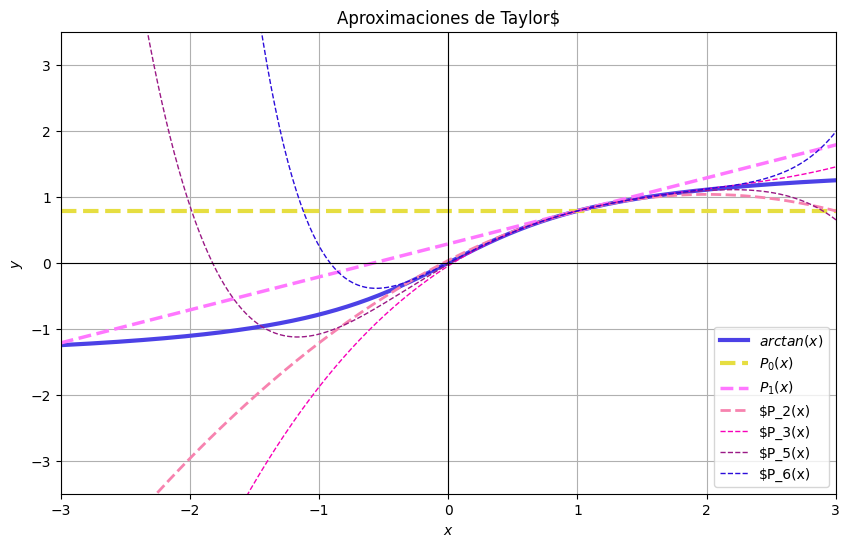

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3, 3.5, 400)

fO= np.arctan(x)
P0=np.pi/4 * np.ones_like(x)
P1=(x- 1)/2 + np.pi/4
P2 =(x- 1)/2 + np.pi/4 - 1/4*(x - 1)**2
P3=(x- 1)/2 + np.pi/4 - 1/4*(x - 1)**2+1/12*(x - 1)**3
P5=(x- 1)/2 + np.pi/4 - 1/4*(x - 1)**2+1/12*(x - 1)**3-1/40*(x - 1)**5
P6=P5+1/48*(x-1)**6

plt.figure(figsize=(10, 6))

plt.plot(x, fO, label=r'$arctan(x)$', color="#4C41E6",linewidth=3)
plt.plot(x, P0, '--',label=r'$P_0(x)$', color="#E6DE41",linewidth=3)
plt.plot(x, P1, '--', label=r'$P_1(x)$', color='#FF77FF',linewidth=2.5)
plt.plot(x, P2, '--', label=r'$P_2(x)', color="#F783AF", linewidth=2)
plt.plot(x, P3, '--', label=r'$P_3(x)', color="#F800BA", linewidth=1)
plt.plot(x, P5, '--', label=r'$P_5(x)', color="#9A1985", linewidth=1)
plt.plot(x, P6, '--', label=r'$P_6(x)', color="#2B0CDB", linewidth=1)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Aproximaciones de Taylor')
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.grid(True)
plt.legend()
plt.ylim(-3.5, 3.5)
plt.xlim(-3, 3)
plt.show()

Legrange

In [63]:
import sympy as sp

def f(x):
    return sp.atan(x)

n = 7

xs = [-1, -0.1, 0.99, 0, 2, 3.04, -2]
ys = [f(x) for x in xs]


def mult_poly(p, q):
    res = [0]*(len(p)+len(q)-1)
    for i in range(len(p)):
        for j in range(len(q)):
            res[i+j] += p[i]*q[j]
    return res


def sum_poly(p, q):
    if len(p) < len(q):
        p += [0]*(len(q)-len(p))
    if len(q) < len(p):
        q += [0]*(len(p)-len(q))
    return [p[i] + q[i] for i in range(len(p))]


def lagrange_manual(xs, ys):
    n = len(xs)
    P = [0]

    for i in range(n):
        Li = [1]
        denom = 1

        for j in range(n):
            if j != i:
                Li = mult_poly(Li, [-xs[j], 1])
                denom *= (xs[i] - xs[j])

        Li = [coef * ys[i] / denom for coef in Li]
        P = sum_poly(P, Li)
    return P

P = lagrange_manual(xs, ys)


print("Polinomio:")

degree = len(P)-1

s = "       "
for i, coef in enumerate(P[::-1]):
    power = degree - i
    if abs(coef) < 1e-12:
        coef = 0
    if power == 0:
        s += f"{coef:+.15f}"
    elif power == 1:
        s += f"{coef:+.15f} x + "
    else:
        s += f"{coef:+.15f} x^{power} + "

print(s)



Polinomio:
       -0.008934288660085 x^6 + +0.033251111216490 x^5 + +0.044695904940870 x^4 + -0.243505695942139 x^3 + -0.035835001202120 x^2 + +0.995579363201762 x + +0.000000000000000


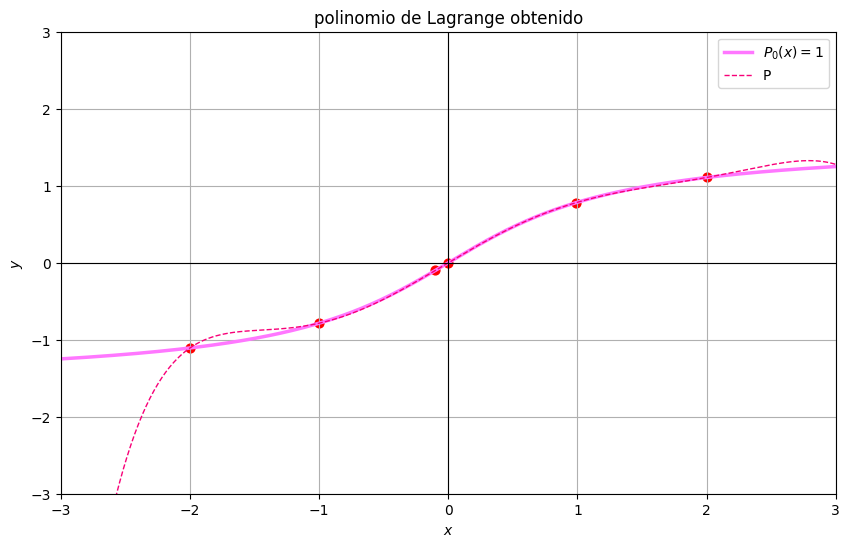

In [66]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3, 3, 400)

fO= np.arctan(x)

P=-0.008934288660085*x**6 + 0.033251111216490*x**5 + 0.044695904940870*x**4 -0.243505695942139*x**3 -0.035835001202120*x**2 + 0.995579363201762*x

plt.figure(figsize=(10, 6))

plt.plot(x, fO, label=r'$P_0(x) = 1$', color='#FF77FF',linewidth=2.5)
plt.plot(x, P, '--', label=r'P', color="#F80078", linewidth=1)
xs = [-1, -0.1, 0.99, 0, 2, 3.04, -2]
ys = [f(x) for x in xs]
for i in xs:
    plt.scatter(i, f(i), color='red', s=40)

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'polinomio de Lagrange obtenido')
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.grid(True)
plt.legend()
plt.ylim(-3, 3)
plt.xlim(-3, 3)
plt.show()